In [2]:
import sys

sys.path.append("..")

from utils.read import read_fvecs

# PCA
## Caricamento del Dataset
Proviamo in primis a caricare il Dataset, una matrice 10000x128 di `np.float32`

In [3]:
dataset = read_fvecs("../data/siftsmall_base.fvecs")

## Creazione RDD
Ora tramite `parallelize()` creiamo l'RDD che conterrà la matrice

In [81]:
rdd = sc.parallelize(dataset)

## Dati per PCA
Per procedere all'esecuzione di PCA ci servono dei dati di partenza quali:
* N: Dimensione del dataset
* dim: Dimensionalità del dataset
* mean: Media del dataset
* cov: Matrice di covarianza

In [82]:
import numpy as np

mean = np.mean(rdd.collect(), axis=0)
cov = np.cov(rdd.collect())

## Autovettori e Autovalori
Calcolo degli autovettori e autovalori a partire da `cov` e sorting

In [83]:
eigval, eigvec = np.linalg.eig(cov)

## Plotting
Come è possibile vedere: 
* Con 12 PC abbiamo rappresentatività per (circa) il 70% del dataset 
* Con 6 (circa) il 60%
* Con 3 tra il 50% ed il 60%

/home/zetaemme/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


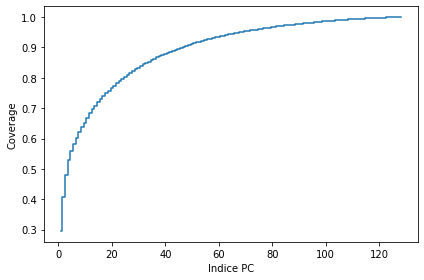

In [92]:
tot = sum(eigval)

var_exp = [(i/tot) for i in sorted(eigval, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt

plt.step(range(1, 129),cum_var_exp[:128], where='mid')

plt.xlabel('Indice PC')
plt.ylabel('Coverage')

plt.tight_layout()
plt.show()

# Sorting

In [111]:
eigvec = np.diag(eigvec)
idx = eigvec.argsort()[::-1]

eigval = eigval[idx]

## Estrazione
Estraiamo i 5/8 PC migliori e li usiamo come nuove assi

In [113]:
print(eigval.shape)

(10000,)
